In [664]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [666]:
df = pd.read_csv('mental-state.csv')

In [667]:
df.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,25.781648,33.836367,-92.769629,19.187957,-1.542262,0.197462,-119.561133,2.032654,21.596272,33.965587,...,0.000230,0.000351,0.000547,0.000381,0.000350,0.000453,0.000442,0.000325,0.000209,2.0
1,29.357891,26.792566,417.203910,19.472121,-38.797263,-16.897194,-29.368531,-9.055370,44.647424,40.893307,...,0.001671,0.000740,0.001122,0.000521,0.000624,0.000439,0.001249,0.000727,0.000801,2.0
2,28.451926,31.076434,72.231301,14.245938,-13.225057,-0.614138,-28.331698,-8.858742,31.450289,30.692883,...,0.000748,0.000569,0.000327,0.000197,0.000833,0.000909,0.000699,0.001165,0.000616,2.0
3,21.282184,19.985184,16.220094,39.787312,1.847866,0.670216,-1.820355,20.220724,21.404679,20.777411,...,0.000990,0.005644,0.006891,0.010546,0.009583,0.011158,0.008853,0.004551,0.002287,1.0
4,20.431516,28.982168,27.540246,19.960398,2.491458,-6.020503,-1.071166,2.655259,16.295039,32.658163,...,0.001659,0.014379,0.014492,0.002949,0.004575,0.008305,0.007202,0.006957,0.009836,2.0


In [668]:
X = df.drop('Label' , axis = 1)
y = df['Label']

**STANDARD SCALING**

In [670]:
from sklearn.preprocessing import StandardScaler

In [671]:
ss = StandardScaler()

In [672]:
ss.fit(X)

StandardScaler()

In [673]:
standard = ss.transform(X)

**PRINCIPAL COMPONENT ANALYSIS**

In [675]:
from sklearn.decomposition import PCA

In [676]:
pca = PCA(n_components=3)

In [677]:
pca.fit(standard)

PCA(n_components=3)

In [678]:
x_pca = pca.transform(standard)

In [682]:
x_pca

array([[-2.10440502e+01, -1.05347969e-02,  7.18144391e-01],
       [-2.40726067e+01, -9.93057359e+00, -1.29671079e+01],
       [-2.29264611e+01, -3.45287247e+00, -3.50159355e+00],
       ...,
       [-2.31024831e+01, -1.75368010e+00, -2.37689583e+00],
       [-1.49562463e+01, -2.56877729e+00, -1.61026999e+00],
       [-4.19366045e+00,  3.77053215e+00,  1.00180466e+01]])

In [684]:
dataf = pd.DataFrame(x_pca)

In [687]:
dataf.head()

,0,1,2
0,-21.044050,-0.010535,0.718144
1,-24.072607,-9.930574,-12.967108
2,-22.926461,-3.452872,-3.501594
3,8.600035,-1.355738,1.933912
4,12.194237,23.783829,-8.415843


In [689]:
dfinal = pd.concat([dataf,y] ,axis = 1)

In [692]:
dfinal.rename({0 : 'Beta' , 1 : 'Alpha' , 2 : 'Theta/Beta'} , axis = 1 , inplace = True)

In [693]:
dfinal.head()

,Beta,Alpha,Theta/Beta,Label
0,-21.044050,-0.010535,0.718144,2.0
1,-24.072607,-9.930574,-12.967108,2.0
2,-22.926461,-3.452872,-3.501594,2.0
3,8.600035,-1.355738,1.933912,1.0
4,12.194237,23.783829,-8.415843,2.0


In [694]:
dfinal[dfinal['Label'] == 0].count()

Beta          819
Alpha         819
Theta/Beta    819
Label         819
dtype: int64

In [697]:
dfinal[dfinal['Label'] == 1].count()

Beta          830
Alpha         830
Theta/Beta    830
Label         830
dtype: int64

In [698]:
dfinal[dfinal['Label'] == 2].count()

Beta          830
Alpha         830
Theta/Beta    830
Label         830
dtype: int64

In [699]:
dfinal.head(20)

,Beta,Alpha,Theta/Beta,Label
0,-21.044050,-0.010535,0.718144,2.0
1,-24.072607,-9.930574,-12.967108,2.0
2,-22.926461,-3.452872,-3.501594,2.0
3,8.600035,-1.355738,1.933912,1.0
4,12.194237,23.783829,-8.415843,2.0
5,-21.880558,-0.714019,-1.407939,2.0
6,-22.180076,0.855001,8.005238,2.0
7,7.101169,-0.205288,1.151697,0.0
8,-15.432978,-3.136460,-2.358833,2.0
9,-22.573769,-2.334958,-2.306585,2.0


**TRAIN TEST SPLIT**

In [703]:
from sklearn.model_selection import train_test_split

In [704]:
X = dfinal.drop('Label' , axis = 1)
y = dfinal['Label']

In [706]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**RANDOM FORESTS**

In [711]:
from sklearn.ensemble import RandomForestClassifier

In [713]:
rf = RandomForestClassifier(n_estimators=1000)

In [715]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [718]:
pred = rf.predict(X_test)

In [719]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [721]:
metrics.mean_absolute_error(pred,y_test)

0.1586021505376344

In [724]:
metrics.mean_squared_error(pred,y_test)

0.16129032258064516

In [725]:
metrics.root_mean_squared_error(pred,y_test)

0.4016096644512494

In [726]:
print(confusion_matrix(pred,y_test))
print('\n')
print(classification_report(pred,y_test))

[[195  48   0]
 [ 58 178   3]
 [  1   7 254]]


              precision    recall  f1-score   support

         0.0       0.77      0.80      0.78       243
         1.0       0.76      0.74      0.75       239
         2.0       0.99      0.97      0.98       262

    accuracy                           0.84       744
   macro avg       0.84      0.84      0.84       744
weighted avg       0.84      0.84      0.84       744



<Axes: ylabel='Label'>

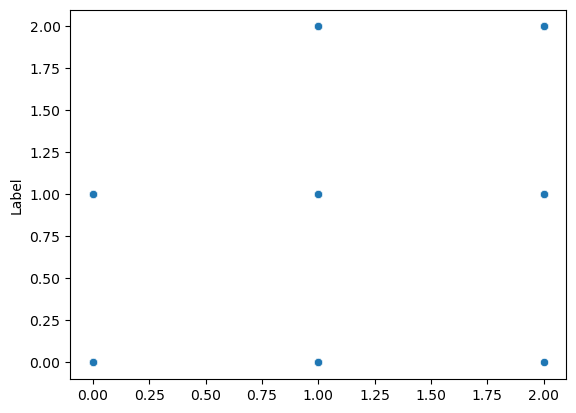

In [728]:
sns.scatterplot(x = pred,y = y_test)

In [730]:
pred

array([1., 2., 2., 0., 2., 1., 0., 2., 0., 1., 2., 0., 2., 2., 1., 2., 2.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 2., 2., 2., 2., 0., 0., 1., 2.,
       1., 0., 1., 0., 1., 0., 1., 1., 2., 0., 1., 0., 1., 1., 2., 1., 2.,
       2., 2., 1., 2., 2., 1., 2., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 2., 0., 0., 1., 0., 1., 0., 1., 2., 0., 0., 2., 2., 0.,
       2., 2., 2., 0., 0., 0., 1., 0., 1., 1., 2., 2., 2., 2., 0., 1., 2.,
       2., 0., 1., 1., 0., 1., 2., 0., 2., 2., 1., 2., 2., 2., 1., 1., 2.,
       2., 1., 0., 2., 1., 0., 2., 1., 2., 1., 2., 0., 0., 1., 2., 1., 0.,
       2., 1., 0., 0., 0., 2., 1., 0., 2., 2., 1., 2., 0., 2., 0., 2., 2.,
       1., 0., 2., 1., 1., 0., 1., 1., 1., 0., 0., 2., 1., 0., 2., 1., 2.,
       2., 2., 2., 1., 1., 2., 0., 1., 2., 1., 1., 2., 0., 1., 1., 2., 2.,
       0., 1., 2., 2., 0., 0., 0., 1., 2., 1., 0., 0., 1., 1., 0., 2., 1.,
       0., 0., 0., 1., 2., 2., 1., 2., 0., 1., 0., 0., 1., 2., 2., 2., 2.,
       0., 2., 1., 0., 2.

**SUPPORT VECTOR MACHINE**

In [732]:
from sklearn.svm import SVC

In [733]:
svm = SVC()

In [734]:
svm.fit(X_train,y_train)

SVC()

In [735]:
pred1 = svm.predict(X_test)

In [736]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72       229
         1.0       0.72      0.68      0.70       246
         2.0       1.00      0.95      0.97       269

    accuracy                           0.80       744
   macro avg       0.80      0.80      0.80       744
weighted avg       0.81      0.80      0.81       744



In [737]:
metrics.mean_absolute_error(pred1,y_test)

0.1975806451612903

Text(0, 0.5, 'Actual Outcomes')

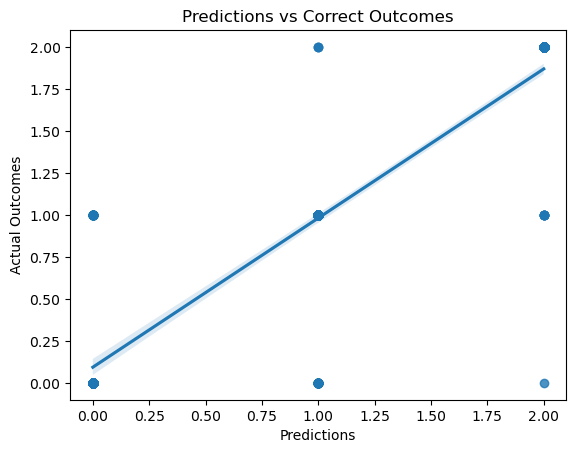

In [765]:
plt.figure()
sns.regplot(x = pred , y = y_test)
plt.title('Predictions vs Correct Outcomes')
plt.xlabel('Predictions')
plt.ylabel('Actual Outcomes')